## Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [30]:
def h(X,theta):
    return np.dot(X,theta)

In [31]:
# Cost function
def J(X,y,theta):
    m=len(y)
    c=1/(2*m)
    temp_0=h(X,theta)-y.reshape(-1)
    temp_1=temp_0.transpose()
    temp_2=np.dot(temp_1,temp_0)
    return c*temp_2

In [32]:
# Gradient Descent
def gradient(X,y,theta,alpha):
    m=len(X)
    c=alpha/m
    temp_0=X.transpose()
    temp_1=h(X,theta)-y.reshape(-1)
    temp_2=np.dot(temp_0,temp_1)
    return theta-(c*temp_2)

## Scaling the data

In [33]:
def normalize(X,column):
    X[column]=(X[column]-X[column].min())/(X[column].max()-X[column].min())
    return X

## Read the data

In [34]:
df=pd.read_csv("./Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


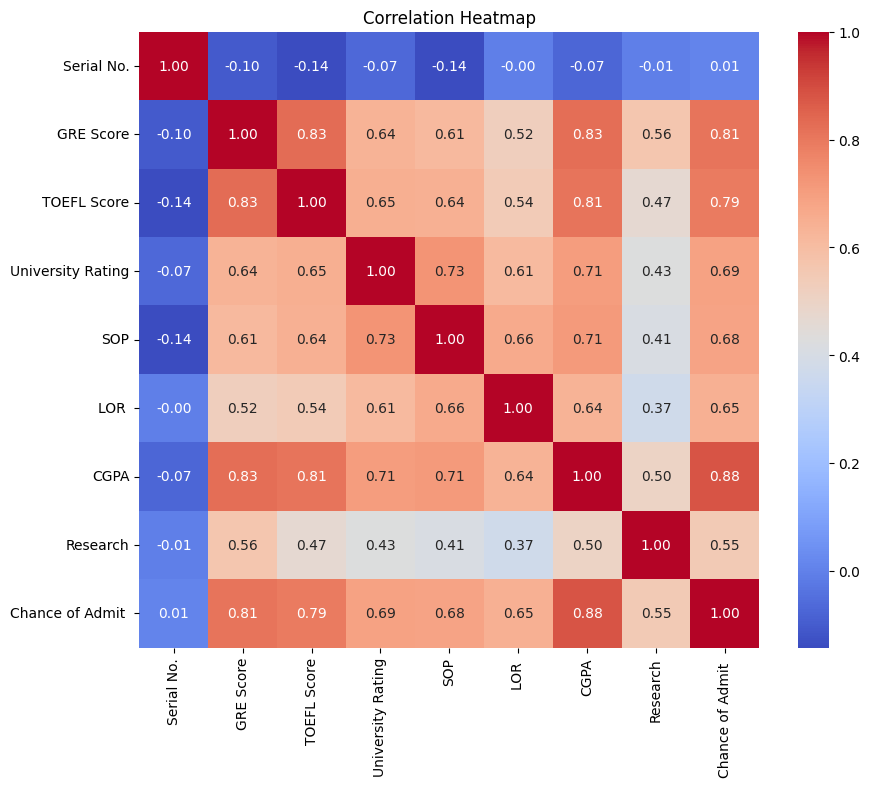

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## setup the data for model

In [36]:
X=df.drop(columns=['Chance of Admit ','Serial No.'],axis=1)
y=pd.DataFrame(data=df['Chance of Admit ']).to_numpy()

## Normalizing the required columns

In [37]:
columns=['GRE Score', 'TOEFL Score','University Rating','CGPA']
X=normalize(X,columns)
y=y*100

## Split the data into training and testing

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,0.62,0.678571,0.50,3.5,4.0,0.650641,1
433,0.52,0.678571,0.75,4.0,5.0,0.557692,0
19,0.26,0.357143,0.50,3.5,3.0,0.544872,0
322,0.48,0.535714,0.25,2.5,4.0,0.471154,0
332,0.36,0.500000,0.50,3.5,2.5,0.451923,1


## Model training

In [39]:
m_train=len(X_train)
m_test=len(X_test)

n=len(X_train.axes[1])+1

ones_train=[1]*m_train
ones_test=[1]*m_test

X_train.insert(0,"X_0",ones_train,True)
X_test.insert(0,"X_0",ones_test,True)

zero_list=[0]*n
theta=np.asarray(zero_list)

alpha=0.005

threshold=0.09

cost_diff=J(X_train,y_train,theta)
print("Initial cost is: ",format(cost_diff))

_iter=0

cost_dict={}

_key="I_"+str(_iter)
cost_dict[_key]=cost_diff

while cost_diff>=threshold:
    initial_cost=J(X_train,y_train,theta)
    theta=gradient(X_train,y_train,theta,alpha)
    
    new_cost=J(X_train,y_train,theta)
    cost_diff=initial_cost-new_cost
    
    _key="I_"+str(_iter)
    cost_dict[_key]=new_cost

    _iter+=1

    print()
    print("Iteration: ",format(_iter))
    print("Cost is: ",format(new_cost))
    print("Cost difference is: ",format(cost_diff))

print("Training is completed")

Initial cost is:  2720.69125

Iteration:  1
Cost is:  2039.515155340213
Cost difference is:  681.1760946597869

Iteration:  2
Cost is:  1533.2569996928019
Cost difference is:  506.25815564741106

Iteration:  3
Cost is:  1156.9979355899534
Cost difference is:  376.25906410284847

Iteration:  4
Cost is:  877.3542568526073
Cost difference is:  279.64367873734614

Iteration:  5
Cost is:  669.5151791181892
Cost difference is:  207.83907773441808

Iteration:  6
Cost is:  515.0413170934432
Cost difference is:  154.47386202474593

Iteration:  7
Cost is:  400.2285119306023
Cost difference is:  114.81280516284096

Iteration:  8
Cost is:  314.8918270510018
Cost difference is:  85.33668487960045

Iteration:  9
Cost is:  251.46181333406145
Cost difference is:  63.43001371694038

Iteration:  10
Cost is:  204.31285302883677
Cost difference is:  47.148960305224676

Iteration:  11
Cost is:  169.2639846689756
Cost difference is:  35.04886835986116

Iteration:  12
Cost is:  143.20791594133428
Cost differ

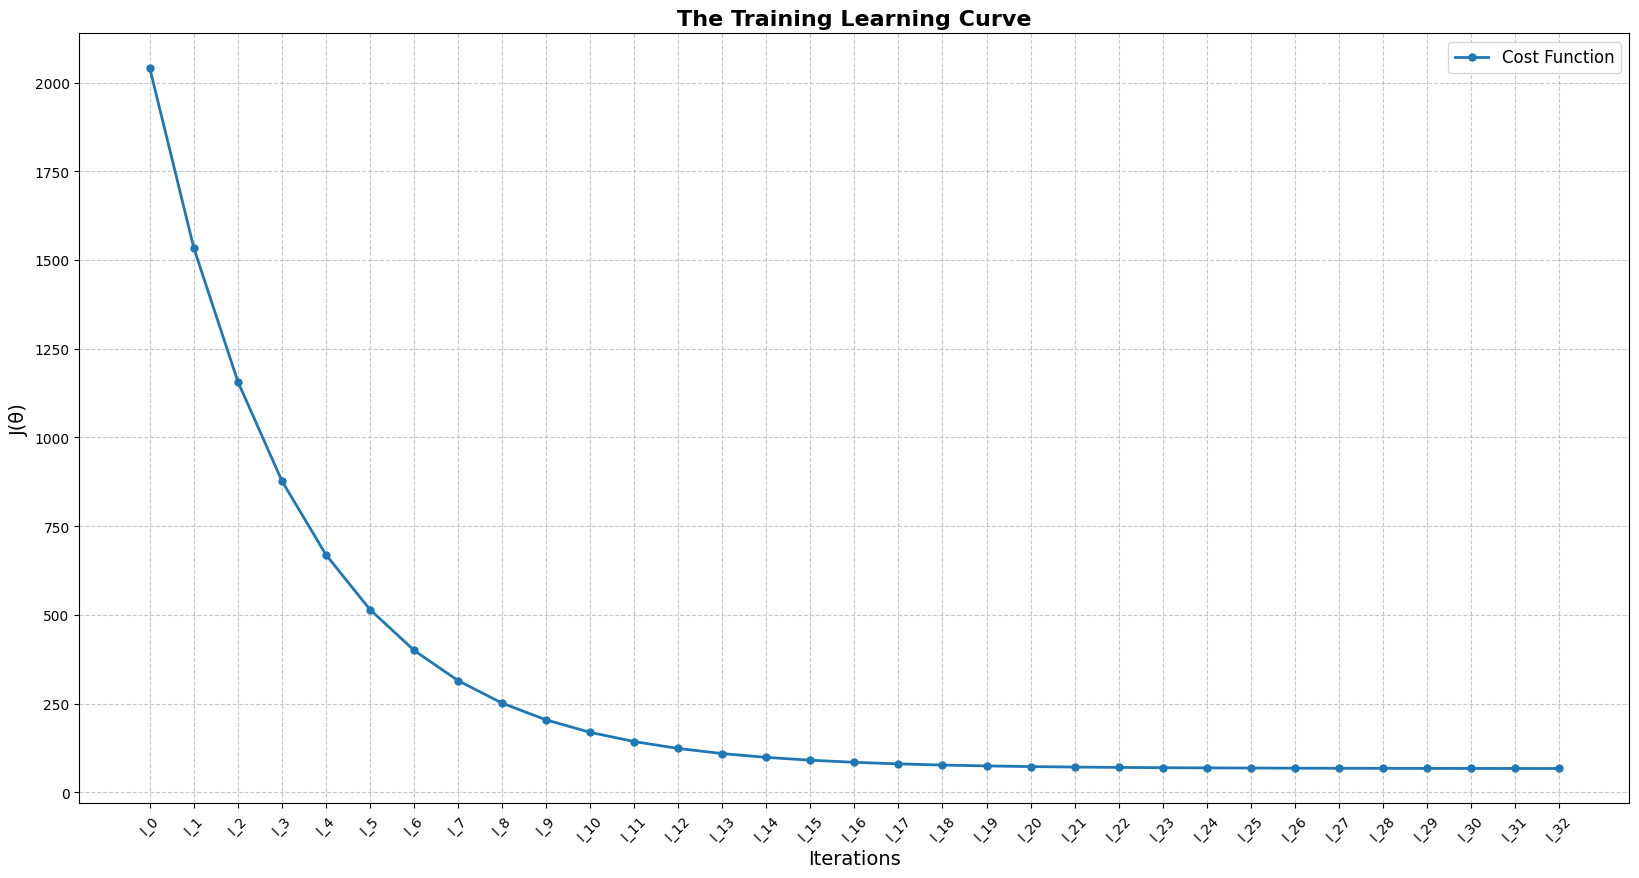

In [40]:
Y1 = [x for x in cost_dict.values()]
X1 = [x for x in cost_dict.keys()]

fig = plt.figure(figsize=[20, 10])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('J(θ)', fontsize=14)
plt.title('The Training Learning Curve', fontsize=16, fontweight='bold')
plt.plot(X1, Y1, color='tab:blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Cost Function')  # Add markers and label
plt.legend(loc='upper right', fontsize=12)  # Add legend
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

In [41]:
print("0:",format(theta))

0: [2.82532828 1.59925931 1.61242115 1.45918281 9.0564344  9.31207594
 1.67016881 1.68563437]


## Model testing

In [42]:
cost_test=J(X_test,y_test,theta)
print("Cost on testing data is: ",format(cost_test))

Cost on testing data is:  60.25141328539805


In [43]:
result = pd.DataFrame(index=X_test.index)
result['Actual CoA'] = y_test
result['Predicted CoA'] = h(X_test, theta)
result.head()

,Actual CoA,Predicted CoA
361,93.0,78.679527
73,84.0,86.495732
374,39.0,46.586450
155,77.0,61.354832
104,74.0,68.381947


## Accuracy

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, result['Predicted CoA'])
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, result['Predicted CoA'])
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, result['Predicted CoA'])
print(f"R-squared: {r2}")

Mean Absolute Error: 9.162669176189867
Mean Squared Error: 120.5028265707961
R-squared: 0.4107441243481853
